<a href="https://colab.research.google.com/github/devu-13here/Face-Mask-Detection/blob/main/Face_Mask_Detection_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : Face Mask Detection Using CNN**

**1. Problem Definition**

The goal of this project is to automatically detect whether a person is wearing a face mask or not using images captured from a camera. This has real-world relevance for public safety, healthcare environments, and access-controlled spaces.

*The task is Binary Image Classification Problem*


*   Class 0 -> Not Wearing a Mask
*   Class 1 -> Wearing a Mask



In [ ]:
!pip install kaggle

In [ ]:
import os
from google.colab import userdata

# Retrieve secrets and set environment variables
try:
    os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
    os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
    print("Kaggle credentials loaded successfully.")
except Exception as e:
    print("Error: Ensure you have added 'KAGGLE_USERNAME' and 'KAGGLE_KEY' to the Secrets tab.")

# Verify by listing datasets
!kaggle datasets list


Kaggle credentials loaded successfully.
ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        310  1.0              
saidaminsaidaxmadov/chocolate-sales                               Chocolate Sales                                         468320  2026-01-04 14:23:35.490000              0         54  1.0              
rockyt07/social-media-user-analysis                               Social Media User Analysis                           247842357  2026-01-14 02:28:41.97

**2. Dataset Preparation**

2.1 Data Collection

A labeled dataset of facial images was used containing two categories:

With Mask

Without Mask

Each image belongs to exactly one class.

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 74% 121M/163M [00:00<00:00, 1.26GB/s]
100% 163M/163M [00:00<00:00, 961MB/s] 


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_709.jpg', 'with_mask_1071.jpg', 'with_mask_1827.jpg', 'with_mask_1197.jpg', 'with_mask_3616.jpg']
['with_mask_488.jpg', 'with_mask_3563.jpg', 'with_mask_1466.jpg', 'with_mask_1990.jpg', 'with_mask_2617.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2053.jpg', 'without_mask_3682.jpg', 'without_mask_1622.jpg', 'without_mask_3231.jpg', 'without_mask_759.jpg']
['without_mask_2586.jpg', 'without_mask_1312.jpg', 'without_mask_2164.jpg', 'without_mask_3414.jpg', 'without_mask_3212.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

2.2 Data Preprocessing

Before training, the images were processed so the neural network could learn effectively:


* **Resize images**	CNNs require fixed-size inputs
* **Normalize pixel values**	Scale values to 0–1 for stable learning
* **Convert to arrays**	Enable numerical computation
* **Assign labels**	Encode “mask” and “no mask” as numeric classes

This ensures that every image is represented as a consistent numerical tensor.

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

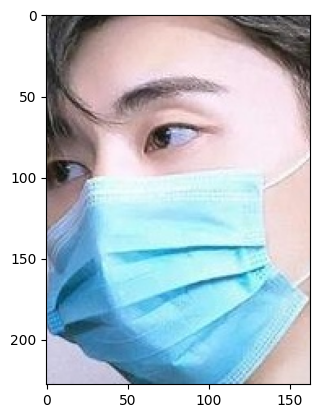

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

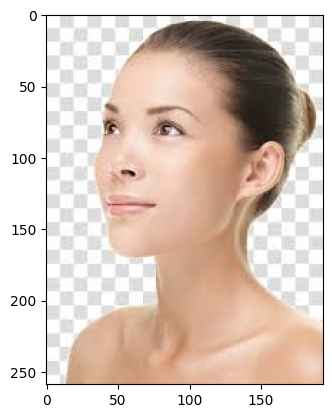

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 33,  22,  18],
        [ 32,  21,  17],
        [ 28,  17,  13],
        ...,
        [190, 195, 192],
        [191, 197, 196],
        [192, 198, 199]],

       [[ 31,  20,  16],
        [ 31,  20,  16],
        [ 30,  19,  15],
        ...,
        [192, 197, 195],
        [191, 197, 196],
        [191, 197, 197]],

       [[ 35,  24,  20],
        [ 37,  26,  22],
        [ 42,  31,  27],
        ...,
        [196, 200, 199],
        [192, 198, 198],
        [190, 196, 196]],

       ...,

       [[232, 210, 199],
        [233, 210, 199],
        [233, 212, 201],
        ...,
        [192, 190, 175],
        [194, 192, 177],
        [195, 193, 178]],

       [[232, 210, 197],
        [233, 210, 198],
        [235, 212, 201],
        ...,
        [198, 195, 179],
        [199, 196, 181],
        [200, 197, 181]],

       [[231, 209, 195],
        [232, 210, 197],
        [235, 212, 201],
        ...,
        [205, 202, 184],
        [205, 201, 184],
        [204, 201, 184]]], dtype=uint8)
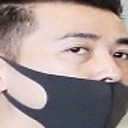

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**3. Data Splitting**

The dataset was divided into:

* Training set → Used to learn patterns

* Test set → Used to evaluate final performance

This separation ensures the model is tested on unseen data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 72,  70,  73],
        [ 72,  70,  73],
        [ 72,  70,  73],
        ...,
        [249, 247, 248],
        [243, 242, 243],
        [224, 224, 224]],

       [[ 62,  60,  63],
        [ 62,  60,  63],
        [ 62,  60,  63],
        ...,
        [251, 249, 250],
        [250, 249, 251],
        [243, 243, 243]],

       [[ 56,  54,  57],
        [ 56,  54,  57],
        [ 56,  54,  57],
        ...,
        [252, 250, 252],
        [253, 252, 253],
        [250, 250, 250]],

       ...,

       [[  9,  11,  36],
        [  2,   3,  25],
        [  1,   2,  22],
        ...,
        [ 31,  24,  32],
        [ 17,  13,  19],
        [  5,   5,   7]],

       [[ 12,  14,  39],
        [  4,   6,  28],
        [  1,   2,  22],
        ...,
        [ 28,  21,  29],
        [ 19,  15,  21],
        [  6,   6,   8]],

       [[ 15,  17,  41],
        [ 12,  14,  36],
        [  6,   7,  27],
        ...,
        [ 25,  17,  26],
        [ 20,  16,  22],
        [  7,   7,   9]]], dtype=uint8)
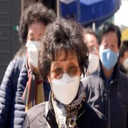

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.28235294, 0.2745098 , 0.28627451],
        [0.28235294, 0.2745098 , 0.28627451],
        [0.28235294, 0.2745098 , 0.28627451],
        ...,
        [0.97647059, 0.96862745, 0.97254902],
        [0.95294118, 0.94901961, 0.95294118],
        [0.87843137, 0.87843137, 0.87843137]],

       [[0.24313725, 0.23529412, 0.24705882],
        [0.24313725, 0.23529412, 0.24705882],
        [0.24313725, 0.23529412, 0.24705882],
        ...,
        [0.98431373, 0.97647059, 0.98039216],
        [0.98039216, 0.97647059, 0.98431373],
        [0.95294118, 0.95294118, 0.95294118]],

       [[0.21960784, 0.21176471, 0.22352941],
        [0.21960784, 0.21176471, 0.22352941],
        [0.21960784, 0.21176471, 0.22352941],
        ...,
        [0.98823529, 0.98039216, 0.98823529],
        [0.99215686, 0.98823529, 0.99215686],
        [0.98039216, 0.98039216, 0.98039216]],

       ...,

       [[0.03529412, 0.04313725, 0.14117647],
        [0.00784314, 0.01176471, 0.09803922],
        [0.00392157, 0

**4. CNN Architecture Design**

A Convolutional Neural Network (CNN) was built from scratch. It has three main types of layers:

4.1 Convolution Layers

These extract visual features like:
* Edges
* Facial contours
* Mask boundaries
They act like pattern detectors.

4.2 Pooling Layers
Pooling layers reduce spatial size while keeping important features.
This:

* Reduces computation
* Makes the model robust to small image shifts

4.3 Fully Connected Layers
After convolution:

* Feature maps are flattened
* Dense layers learn the final decision boundary
* Final layer outputs probability of Mask vs No Mask

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**5. Model Compilation**

The network was configured using:

Component	Purpose
* Loss function (binary cross-entropy)	Measures how wrong predictions are
* Optimizer (Adam)	Efficient weight updates
* Metrics (accuracy)	Track classification performance

This prepares the CNN for training.

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

**6. Model Training**

The CNN was trained over multiple epochs using batches of images.

During training:
* The model learns visual differences between masked and unmasked faces
* Validation accuracy ensures it is not memorizing data
* Loss curves show convergence

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - acc: 0.7224 - loss: 0.7253 - val_acc: 0.8760 - val_loss: 0.2900
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8970 - loss: 0.2695 - val_acc: 0.8876 - val_loss: 0.2486
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9070 - loss: 0.2375 - val_acc: 0.9025 - val_loss: 0.2363
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9259 - loss: 0.1906 - val_acc: 0.9074 - val_loss: 0.1975
Epoch 5/5
168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9375 - loss: 0.1699

**7. Performance Evaluation**

After training, the model was evaluated on test images:


* **Accuracy**	Overall correctness
* **Loss**	Confidence of predictions

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')